# Stroke Prediction with Machine Learning Techniques

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The %matplotlib inline command tells the IPython environment to draw the plots immediately after the current cell.

In [2]:
# to hide all warnings
import warnings
warnings.filterwarnings('ignore')

# Import Dataset
Importing dataset using pandas dataframe and read_csv function

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis (EDA)

In [4]:
# get the first 5 records of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# get the last 5 records of the dataset
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# explore the shape of the dataset
df.shape

(5110, 12)

In [7]:
# view all columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
# explore all the features and their corresponding column name, non-null counts along with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# check data types for all features
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# get  various summary statistics about our dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# summary for object datatype
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [12]:
# check all unique value counts per feature
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
# count null values per feature
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# check bmi column has null value or not
df['bmi'].isna().values.any()

True

In [15]:
# count null values in 'bmi'
df['bmi'].isna().sum()

201

# Data Visualization

In [16]:
# mininum and maximum value from age column
print('Min age:',df['age'].min())
print('Max age:',df['age'].max())

Min age: 0.08
Max age: 82.0


In [17]:
# total number of records
print('Total number of records:',len(df))

# filter dataframe by using query on stroke and filter for those who has stroke
those_who_had_stroke = df.query('stroke == 1')
print('People who had stroke:',len(those_who_had_stroke))

# filter dataframe by using query on stroke and filter for those who has no stroke
those_who_had_no_stroke = df.query('stroke == 0')
print('People who had no stroke:',len(those_who_had_no_stroke))

Total number of records: 5110
People who had stroke: 249
People who had no stroke: 4861


Text(0.5, 1.0, 'Stroke Value Count')

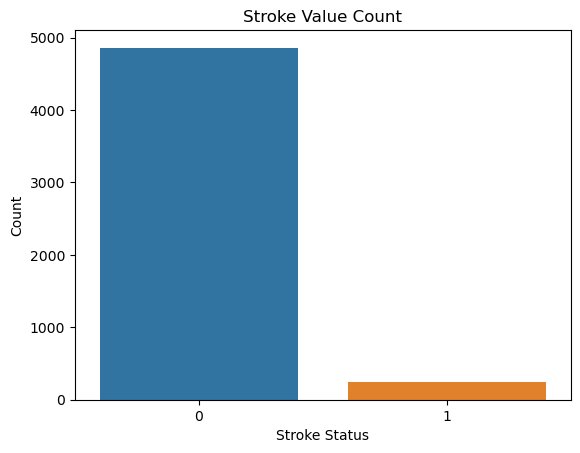

In [18]:
# visualize stoke and no stroke value counts using a bar plot
sns.countplot(df['stroke'])

# add lables and title to the figure
plt.xlabel('Stroke Status')
plt.ylabel('Count')
plt.title('Stroke Value Count')

Text(0.5, 1.0, 'People who had stroke')

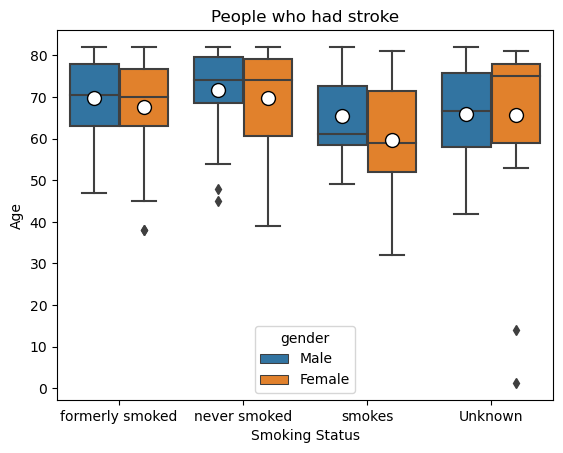

In [19]:
# visualize data using boxplot
sns.boxplot(data=those_who_had_stroke,x='smoking_status',y='age',hue='gender',showmeans=True,meanprops={'marker':"o", 
                                                                                 "markerfacecolor":"white",
                                                                                 "markersize":"10",
                                                                                "markeredgecolor":"black"})

# add lables and title to the figure
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.title('People who had stroke')

Text(0.5, 1.0, 'People who had stroke')

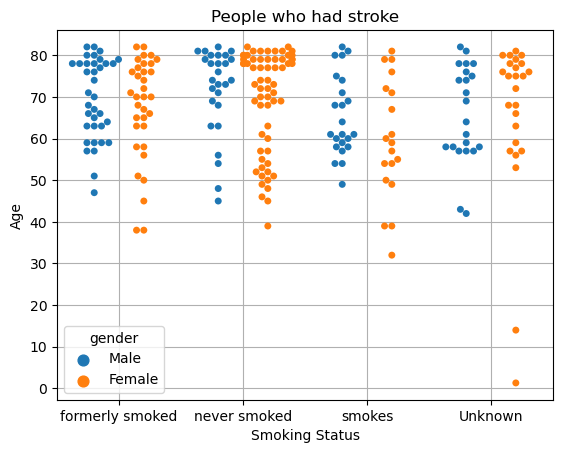

In [20]:
# using swarmplot visualize people age those who has stroke
sns.swarmplot(data=those_who_had_stroke,x='smoking_status',y='age',hue='gender',split=True)

# add grid, lables and title to the figure
plt.grid()
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.title('People who had stroke')

# Visualize Categorical Features

In [21]:
# all categorical features
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [22]:
# handle categorical data: gender
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

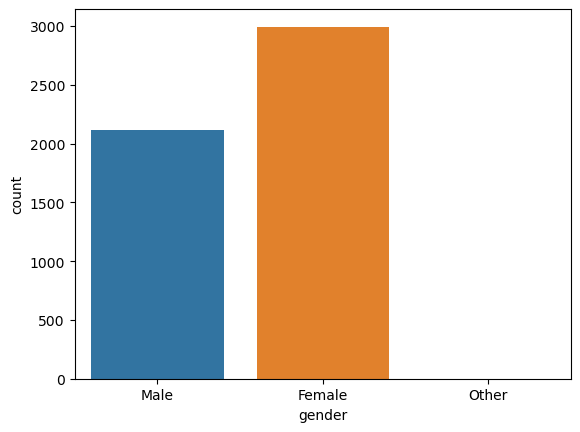

In [23]:
# visualize gender using count plot
sns.countplot(df['gender'])

In [24]:
# handle categorical data: ever married
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

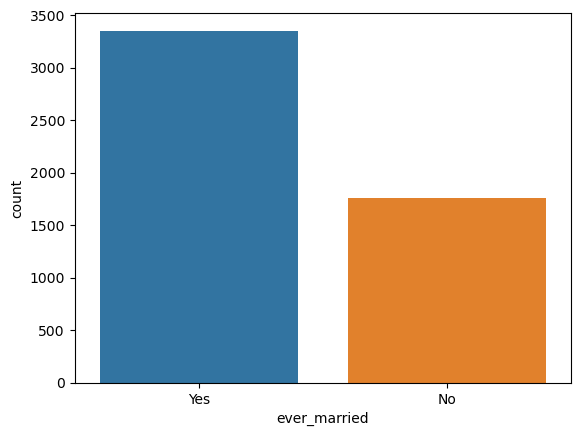

In [25]:
# visualize using count plot
sns.countplot(df['ever_married'])

In [26]:
# work type
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

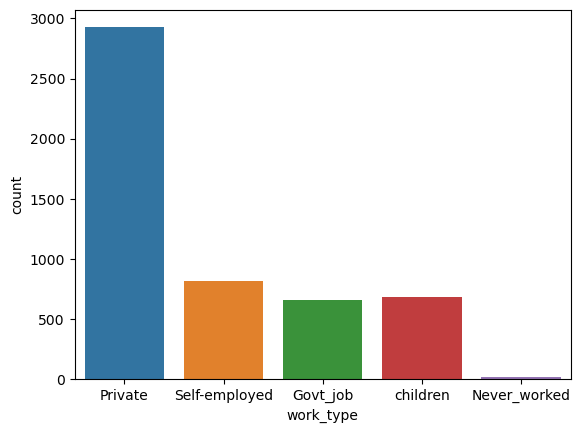

In [27]:
# visualize work type
sns.countplot(df['work_type'])

In [28]:
# Residence type
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

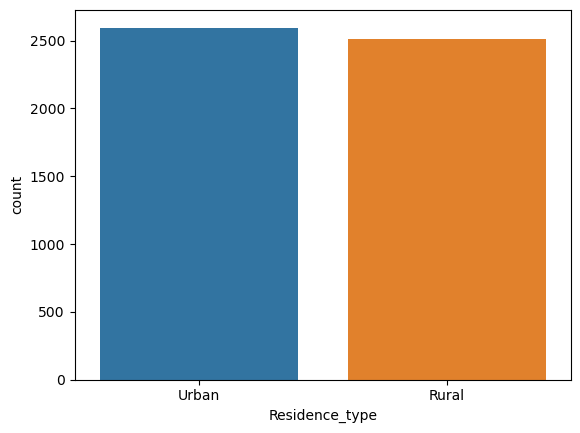

In [29]:
# visualize Residence_type
sns.countplot(df['Residence_type'])

In [30]:
# smoking status
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

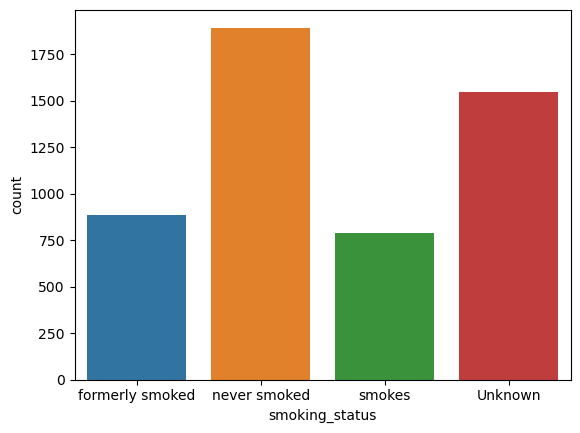

In [31]:
# visualize smoking status
sns.countplot(df['smoking_status'])

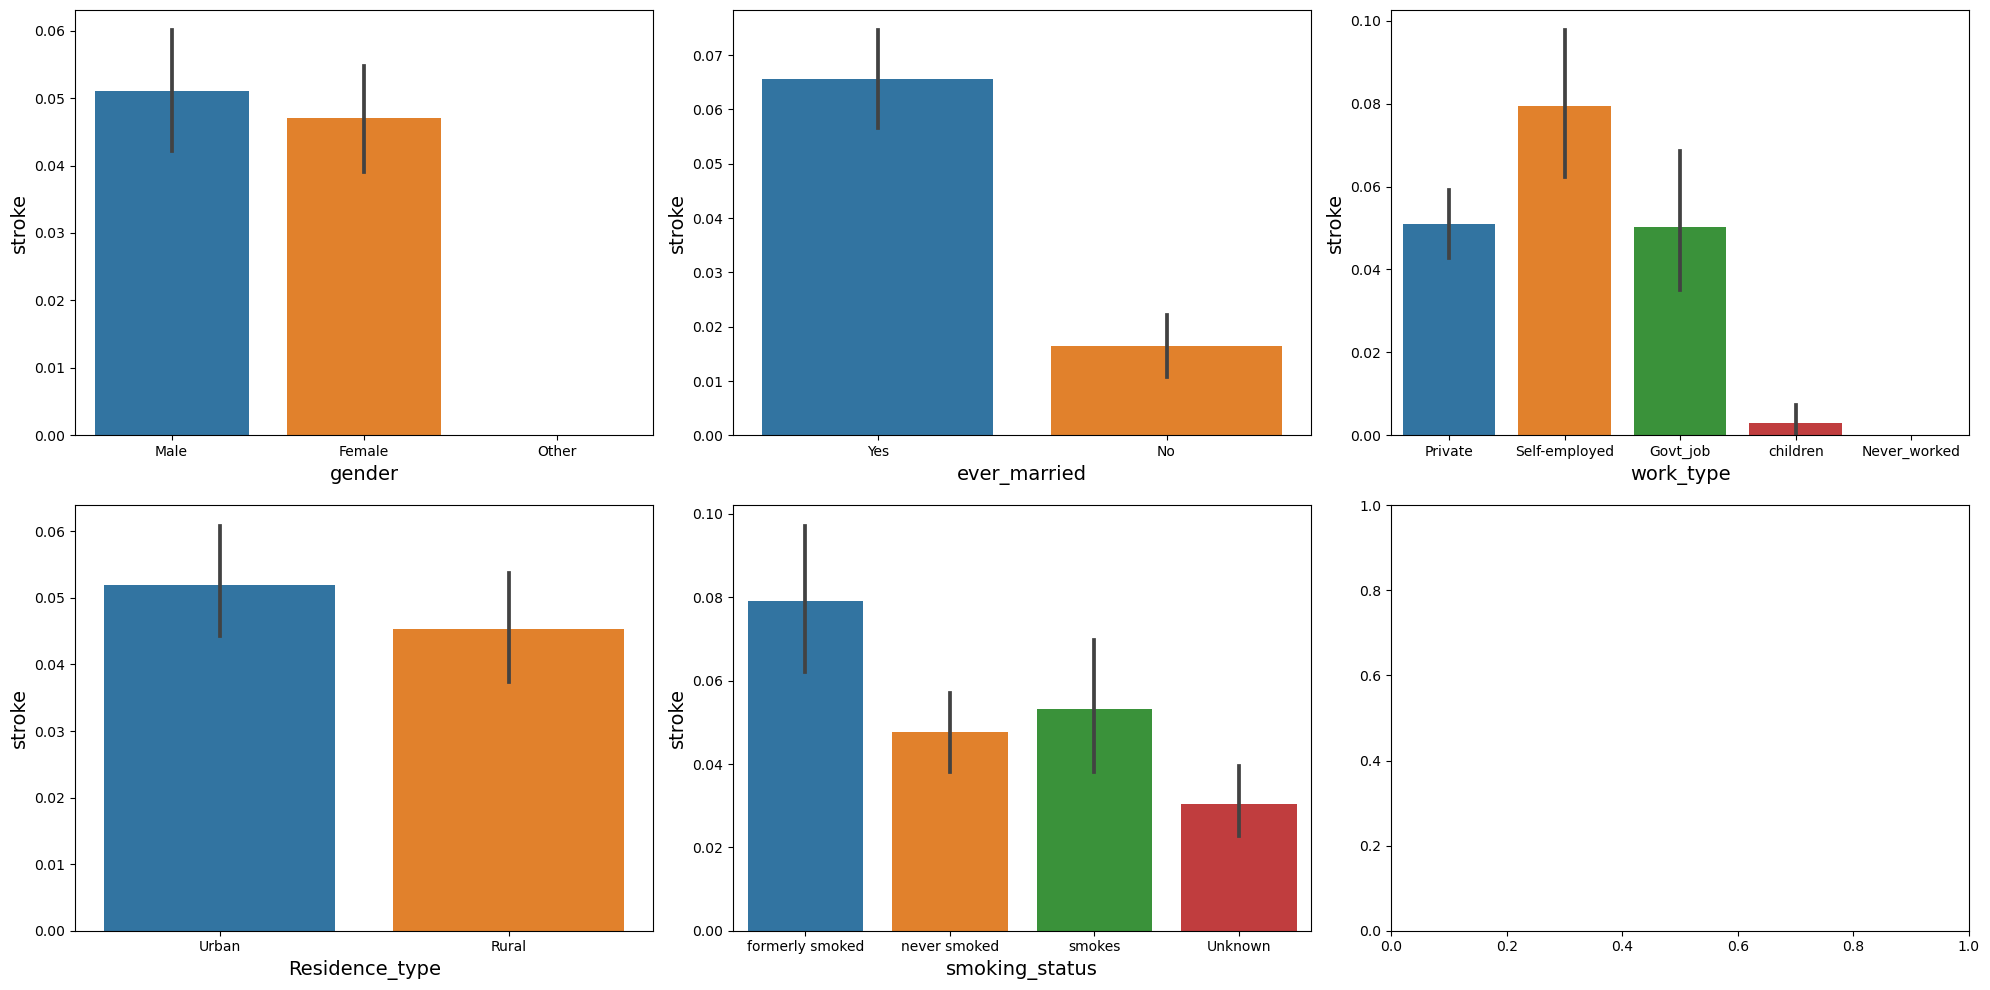

In [32]:
# show the ralation between categorical featues and stroke
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

# drawing figures
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for position, catgeory in enumerate(categorical_features):
    sns.barplot(df[catgeory], df[target], ax=axes[position])
    axes[position].set_ylabel('stroke', fontsize=14)
    axes[position].set_xlabel(catgeory, fontsize=14)
    
plt.tight_layout()

In [33]:
# pick columns that we are going to visualize distribution
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']].rename(columns={
    'age': 'Age', 
    'hypertension' : 'Hypertension', 
    'heart_disease' : 'Heart Disease', 
    'avg_glucose_level' : 'Avg Glucose Level', 
    'bmi' : 'Bmi'})

cols.head()

,Age,Hypertension,Heart Disease,Avg Glucose Level,Bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


# Distribution plot

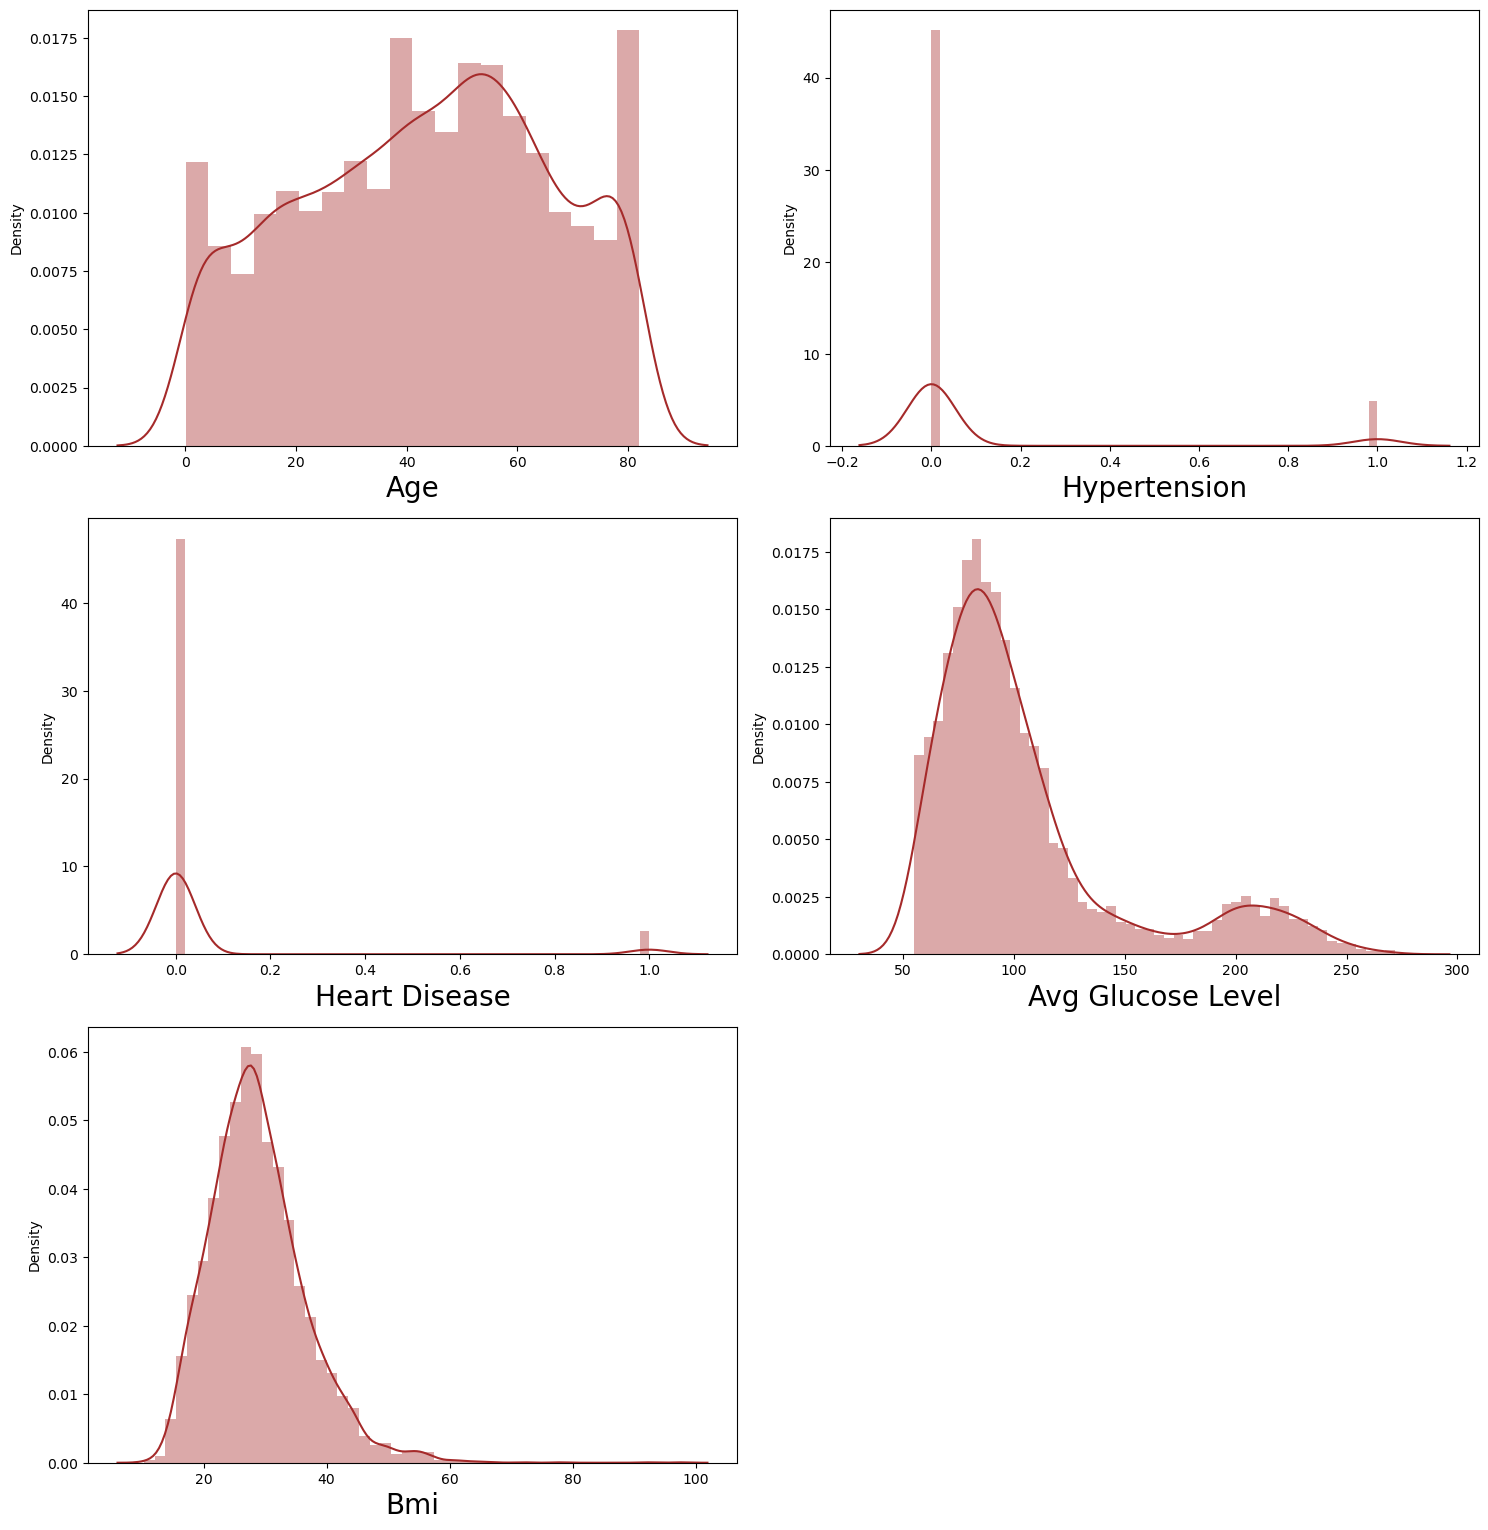

In [34]:
# visualize data distribution for each feature using distribution plot
plt.figure(figsize=(15,25))
plotnumber=1

for column in cols:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(cols[column],color='brown')
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

# Kernel Density Estimate (KDE) plot

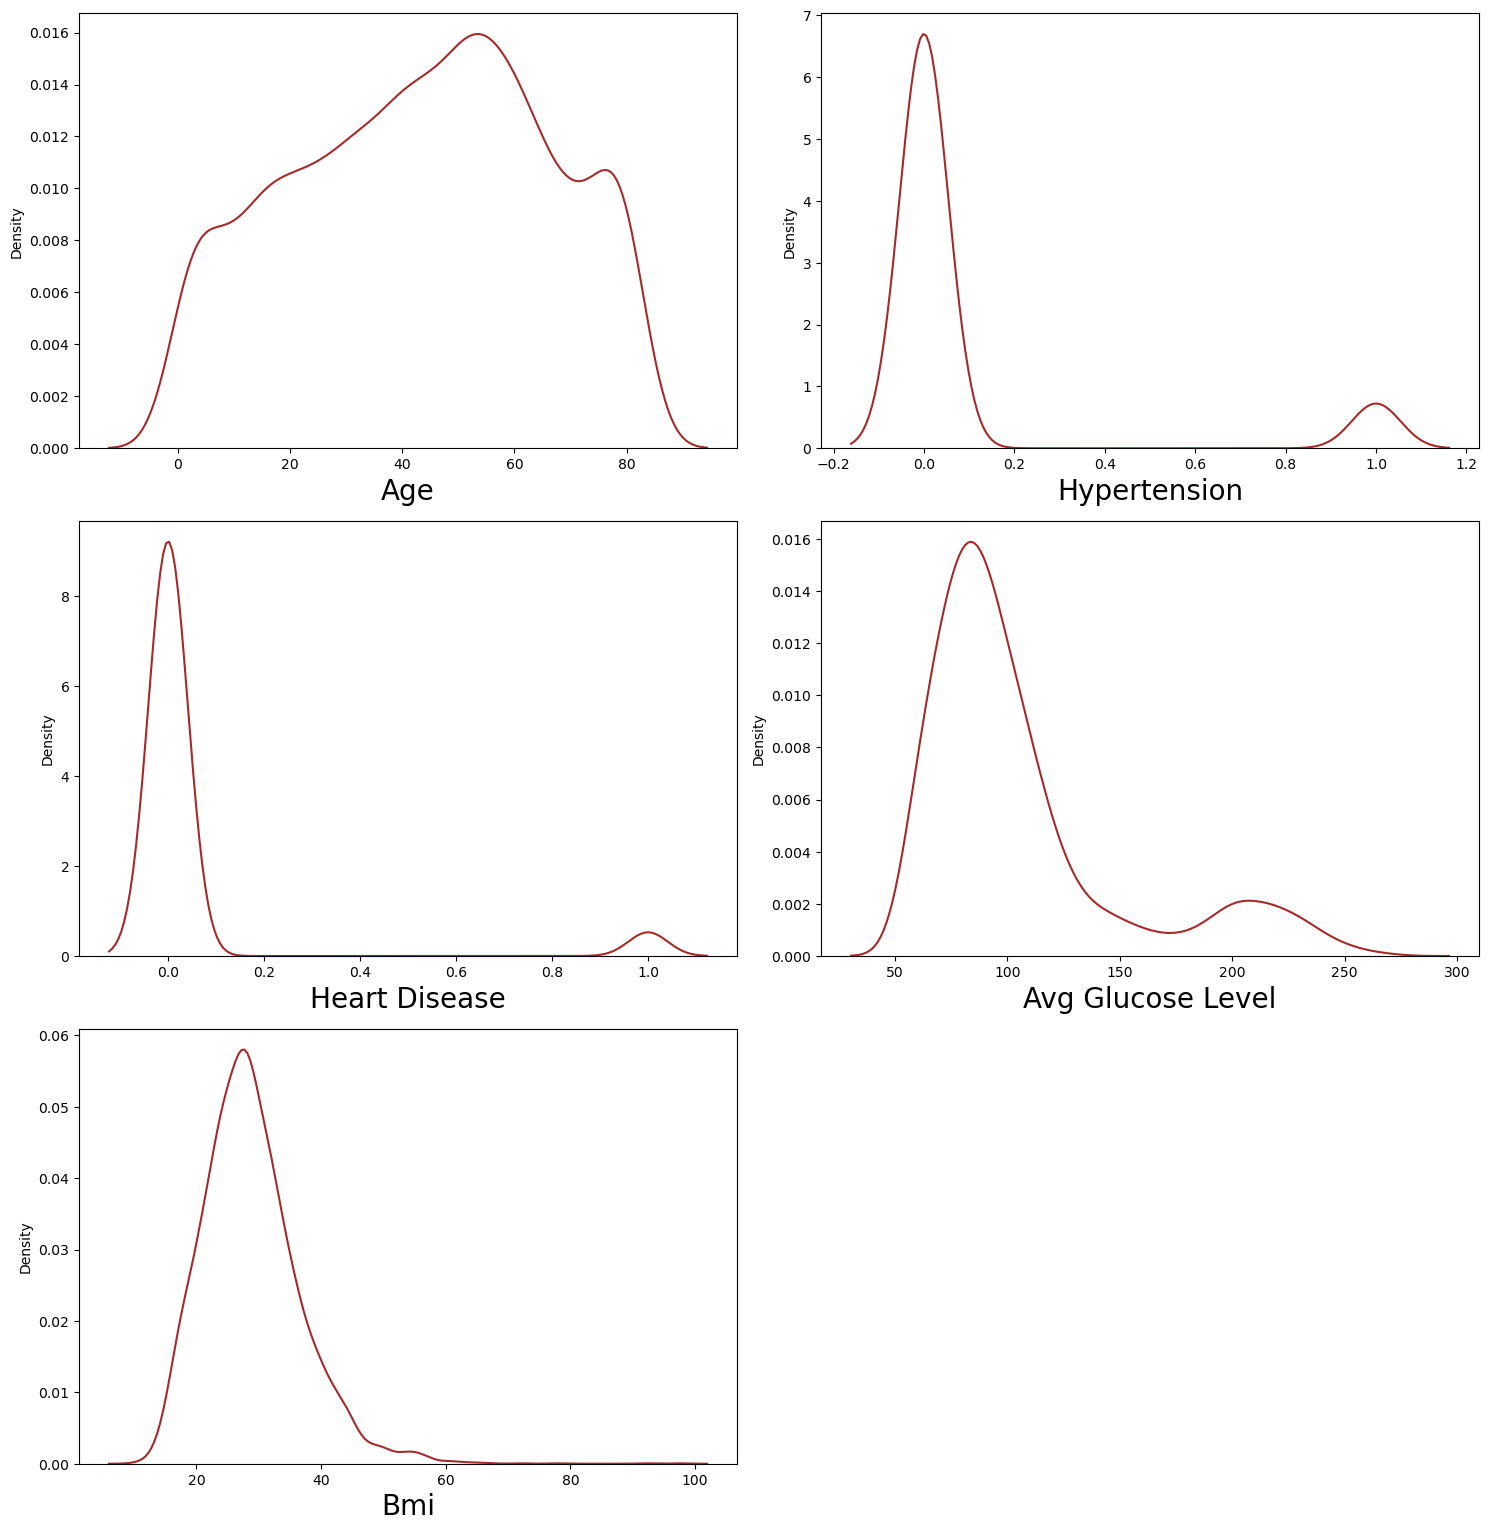

In [35]:
# visualize data distribution for each feature using KDE plot
plt.figure(figsize=(15,25))
plotnumber = 1

for column in cols:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.kdeplot(cols[column],color='brown')
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1

plt.tight_layout()

# Find Outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

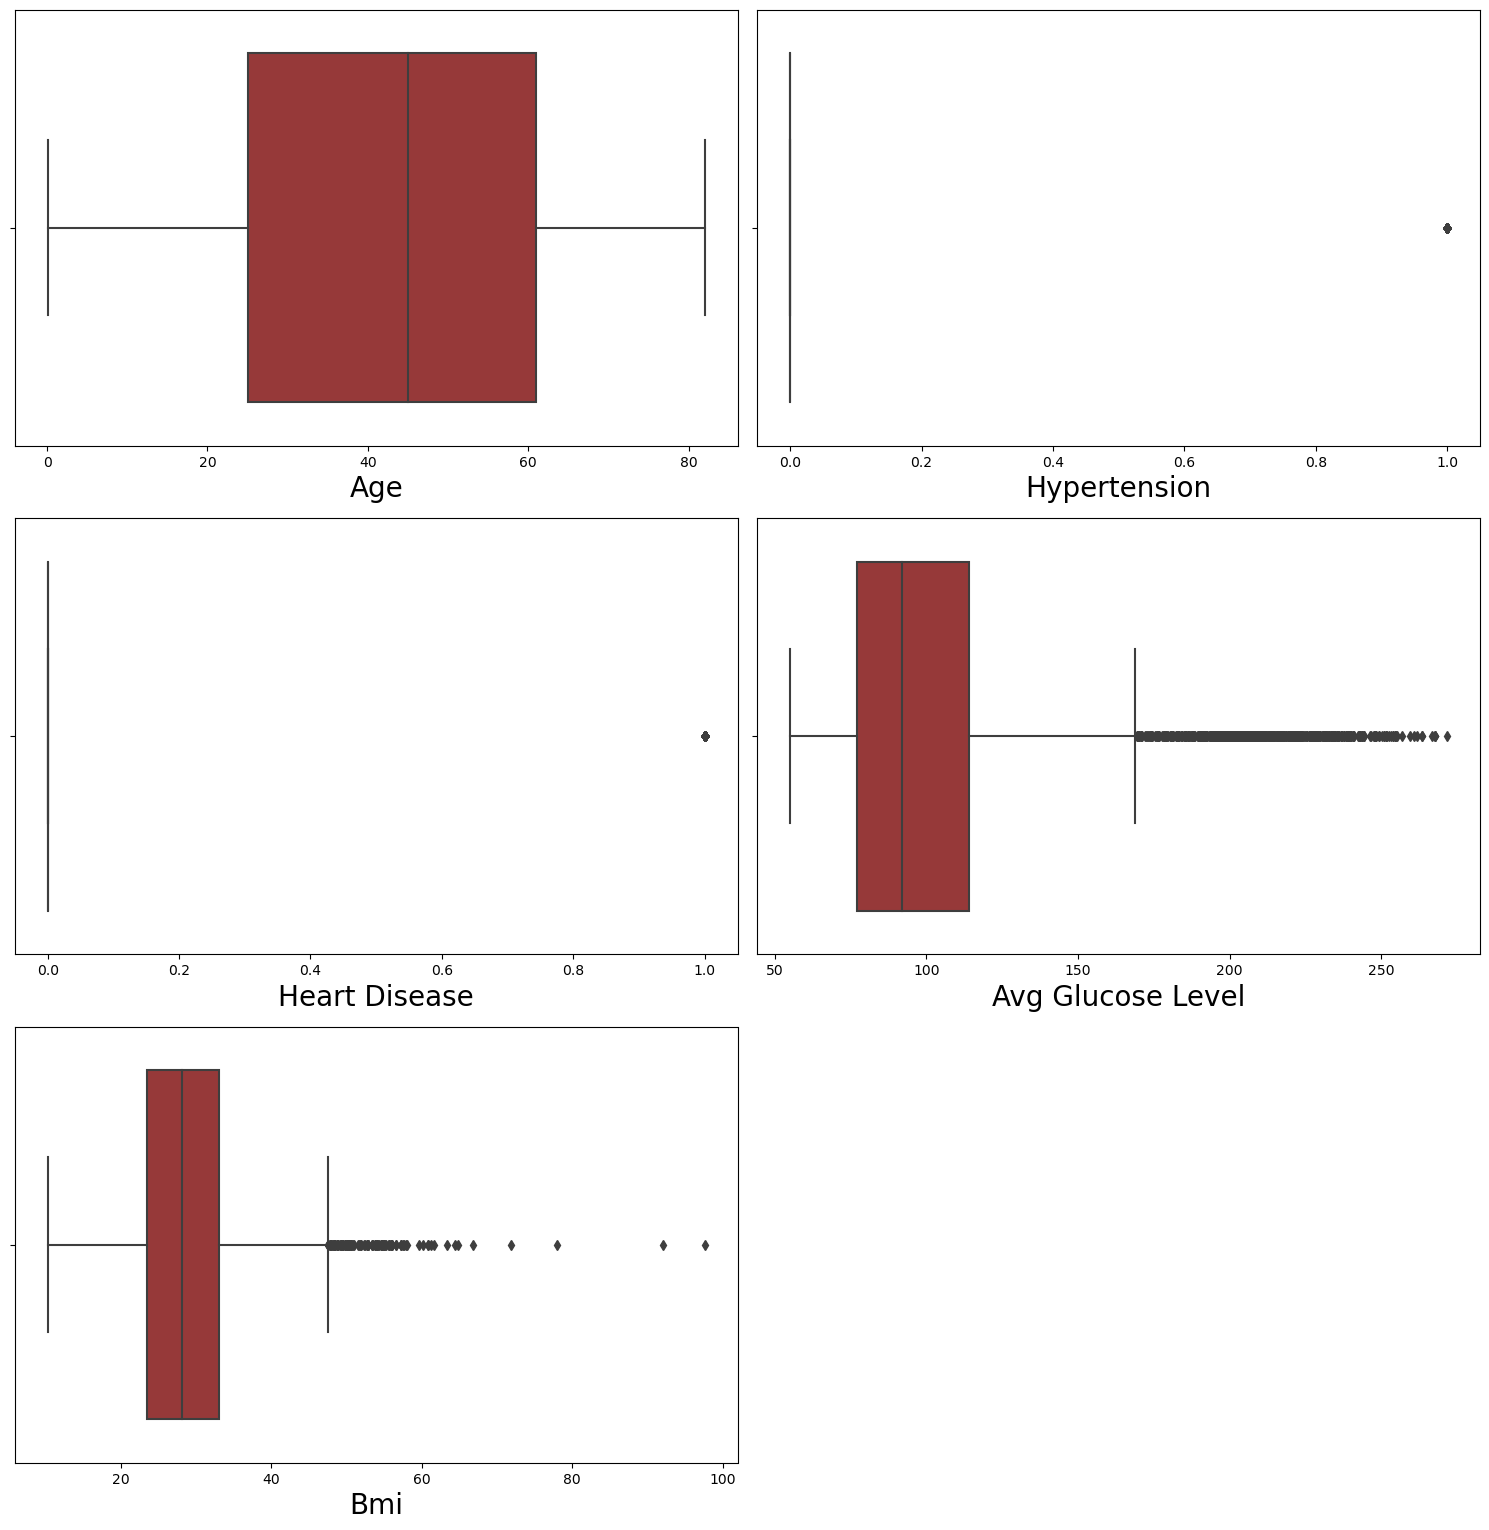

In [36]:
# visualize data outliers using boxplot
plt.figure(figsize=(15,25))
plotnumber = 1

for column in cols:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(cols[column],color='brown')
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()